In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.097775,-1.854141,0.027090,0.887938,-2.324600,0.639877,-0.838135,0.986024,-1.025914,1.296806,-0.395379,1
1,-1.097775,-1.854141,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,0.249837,-0.395379,1
2,0.579956,0.539333,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,0.249837,-0.395379,1
3,-0.940502,0.539333,-0.643710,0.555455,-2.324600,0.639877,1.404585,-1.478627,0.974740,0.249837,-0.395379,1
4,-1.097775,0.539333,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,1.296806,-0.395379,1


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,-1.097775,-1.854141,0.027090,0.887938,-2.324600,0.639877,-0.838135,0.986024,-1.025914,1.296806,-0.395379
1,-1.097775,-1.854141,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,0.249837,-0.395379
2,0.579956,0.539333,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,0.249837,-0.395379
3,-0.940502,0.539333,-0.643710,0.555455,-2.324600,0.639877,1.404585,-1.478627,0.974740,0.249837,-0.395379
4,-1.097775,0.539333,1.432795,0.555455,-0.132843,0.639877,-0.838135,-0.896268,0.974740,1.296806,-0.395379
...,...,...,...,...,...,...,...,...,...,...,...
1637,-1.097775,0.539333,1.432795,-1.440979,-2.324600,0.639877,-0.838135,-0.896268,-1.025914,1.296806,1.534482
1638,1.199533,0.539333,0.027090,-1.440979,-2.324600,-1.562801,1.404585,0.986024,-1.025914,-1.098666,-0.395379
1639,-0.940502,0.539333,1.432795,-1.440979,0.538046,0.639877,-0.838135,-0.896268,0.974740,1.296806,-0.395379
1640,1.199533,0.539333,0.027090,-0.571876,0.538046,0.639877,-0.333943,-0.896268,-1.025914,-1.098666,-1.129873


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,1
1,1
2,1
3,1
4,1
...,...
1637,1
1638,0
1639,1
1640,1


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2360
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7652232746955345, 0.8006088280060882, 0.8191304347826087, 0.8133874239350912, 0.7990255785627284, 0.8112633181126332, 0.8073022312373225, 0.8480243161094225, 0.8242424242424242]
positive_predictive_values_dtc:  [0.8016917293233082, 0.8383947939262473, 0.8357487922705314, 0.8366197183098592, 0.8374125874125874, 0.8568129330254042, 0.8562691131498471, 0.8968609865470852, 0.8990825688073395]
recalls_dtc:  [0.8624873609706775, 0.8724604966139955, 0.9057591623036649, 0.8972809667673716, 0.8693284936479129, 0.8568129330254042, 0.8536585365853658, 0.8810572687224669, 0.8448275862068966]
f1_scores_dtc:  [0.8309790550414028, 0.8550884955752213, 0.8693467336683417, 0.8658892128279884, 0.8530721282279609, 0.8568129330254042, 0.8549618320610687, 0.8888888888888888, 0.8711111111111111]
specificities_dtc:  [0.5685071574642127, 0.6518691588785047, 0.6476683937823834, 0.6419753086419753, 0.6555555555555556, 0.7232142857142857, 0.7151515151515152, 0.7745098039215687, 0.7755102040816

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)
from sklearn.model_selection import train_test_split

seed = 159

accuracies_xgb = []
positive_predictive_values_xgb = []
recalls_xgb = []
f1_scores_xgb = []
specificities_xgb = []
npvs_xgb = []
plrs_xgb = []
nlrs_xgb = []
aucs_xgb = []
mccs_xgb = []
balanced_accuracies_xgb = []
f2_scores_xgb = []
fprs_xgb = []
fnrs_xgb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
    model_xgb = xgb.fit(X_train, Y_train)
    pred_xgb = model_xgb.predict(X_test)

    cm_xgb = confusion_matrix(Y_test, pred_xgb)
    tn, fp, fn, tp = cm_xgb.ravel()

    accuracy_xgb = accuracy_score(Y_test, pred_xgb)
    accuracies_xgb.append(accuracy_xgb)    

    ppv_xgb = precision_score(Y_test, pred_xgb)
    positive_predictive_values_xgb.append(ppv_xgb)    

    recall_xgb = recall_score(Y_test, pred_xgb)
    recalls_xgb.append(recall_xgb)    

    f1_score_xgb = f1_score(Y_test, pred_xgb)
    f1_scores_xgb.append(f1_score_xgb)    

    specificity_xgb = tn / (tn + fp)
    specificities_xgb.append(specificity_xgb)

    npv_xgb = tn / (tn + fn)
    npvs_xgb.append(npv_xgb)

    plr_xgb = recall_xgb / (1 - specificity_xgb)
    plrs_xgb.append(plr_xgb)

    nlr_xgb = (1 - recall_xgb) / specificity_xgb
    nlrs_xgb.append(nlr_xgb)

    # Compute probabilities for ROC AUC
    pred_xgb_proba = model_xgb.predict_proba(X_test)[:, 1] if hasattr(model_xgb, "predict_proba") else None
    if pred_xgb_proba is not None:
        auc_xgb = roc_auc_score(Y_test, pred_xgb_proba)
    else:
        auc_xgb = 0.0
    aucs_xgb.append(auc_xgb)

    mcc_xgb = matthews_corrcoef(Y_test, pred_xgb)
    mccs_xgb.append(mcc_xgb)

    balanced_accuracy_xgb = balanced_accuracy_score(Y_test, pred_xgb)
    balanced_accuracies_xgb.append(balanced_accuracy_xgb)

    f2_score_xgb = fbeta_score(Y_test, pred_xgb, beta=2)
    f2_scores_xgb.append(f2_score_xgb)

    fpr_xgb = fp / (fp + tn)
    fprs_xgb.append(fpr_xgb)

    fnr_xgb = fn / (fn + tp)
    fnrs_xgb.append(fnr_xgb)

print("accuracies_xgb: ", accuracies_xgb)
print("positive_predictive_values_xgb: ", positive_predictive_values_xgb)
print("recalls_xgb: ", recalls_xgb)
print("f1_scores_xgb: ", f1_scores_xgb)
print("specificities_xgb: ", specificities_xgb)
print("npvs_xgb: ", npvs_xgb)
print("plrs_xgb: ", plrs_xgb)
print("nlrs_xgb: ", nlrs_xgb)
print("aucs_xgb: ", aucs_xgb)
print("mccs_xgb: ", mccs_xgb)
print("balanced_accuracies_xgb: ", balanced_accuracies_xgb)
print("f2_scores_xgb: ", f2_scores_xgb)
print("fprs_xgb: ", fprs_xgb)
print("fnrs_xgb: ", fnrs_xgb)

accuracies_xgb:  [0.8071718538565629, 0.8295281582952816, 0.8365217391304348, 0.8448275862068966, 0.8635809987819733, 0.8447488584474886, 0.8661257606490872, 0.8814589665653495, 0.8909090909090909]
positive_predictive_values_xgb:  [0.8283858998144712, 0.8531317494600432, 0.8531553398058253, 0.8771929824561403, 0.8984238178633975, 0.8726114649681529, 0.9085714285714286, 0.9159663865546218, 0.940677966101695]
recalls_xgb:  [0.8992950654582075, 0.8997722095671982, 0.912987012987013, 0.8968609865470852, 0.9047619047619048, 0.9072847682119205, 0.9034090909090909, 0.919831223628692, 0.9098360655737705]
f1_scores_xgb:  [0.8623853211009175, 0.8758314855875832, 0.8820577164366374, 0.8869179600886918, 0.9015817223198594, 0.8896103896103896, 0.905982905982906, 0.9178947368421052, 0.925]
specificities_xgb:  [0.6185567010309279, 0.6880733944954128, 0.6815789473684211, 0.7350157728706624, 0.7716535433070866, 0.7058823529411765, 0.7730496453900709, 0.782608695652174, 0.8372093023255814]
npvs_xgb:  [0

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 159
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

accuracies_rf:  [0.8159675236806495, 0.834855403348554, 0.8417391304347827, 0.8681541582150102, 0.8660170523751523, 0.8721461187214612, 0.8904665314401623, 0.8996960486322189, 0.9212121212121213]
positive_predictive_values_rf:  [0.8286235186873291, 0.8482613277133825, 0.8483412322274881, 0.8877697841726618, 0.9015817223198594, 0.8867924528301887, 0.9093406593406593, 0.9112903225806451, 0.936]
recalls_rf:  [0.9154078549848943, 0.9168564920273349, 0.9298701298701298, 0.922272047832586, 0.9047619047619048, 0.9337748344370861, 0.9403409090909091, 0.9535864978902954, 0.9590163934426229]
f1_scores_rf:  [0.8698564593301435, 0.8812260536398467, 0.8872366790582404, 0.9046920821114369, 0.903169014084507, 0.9096774193548387, 0.9245810055865922, 0.931958762886598, 0.9473684210526315]
specificities_rf:  [0.6123711340206186, 0.6697247706422018, 0.6631578947368421, 0.7539432176656151, 0.7795275590551181, 0.7352941176470589, 0.7659574468085106, 0.7608695652173914, 0.813953488372093]
npvs_rf:  [0.77952

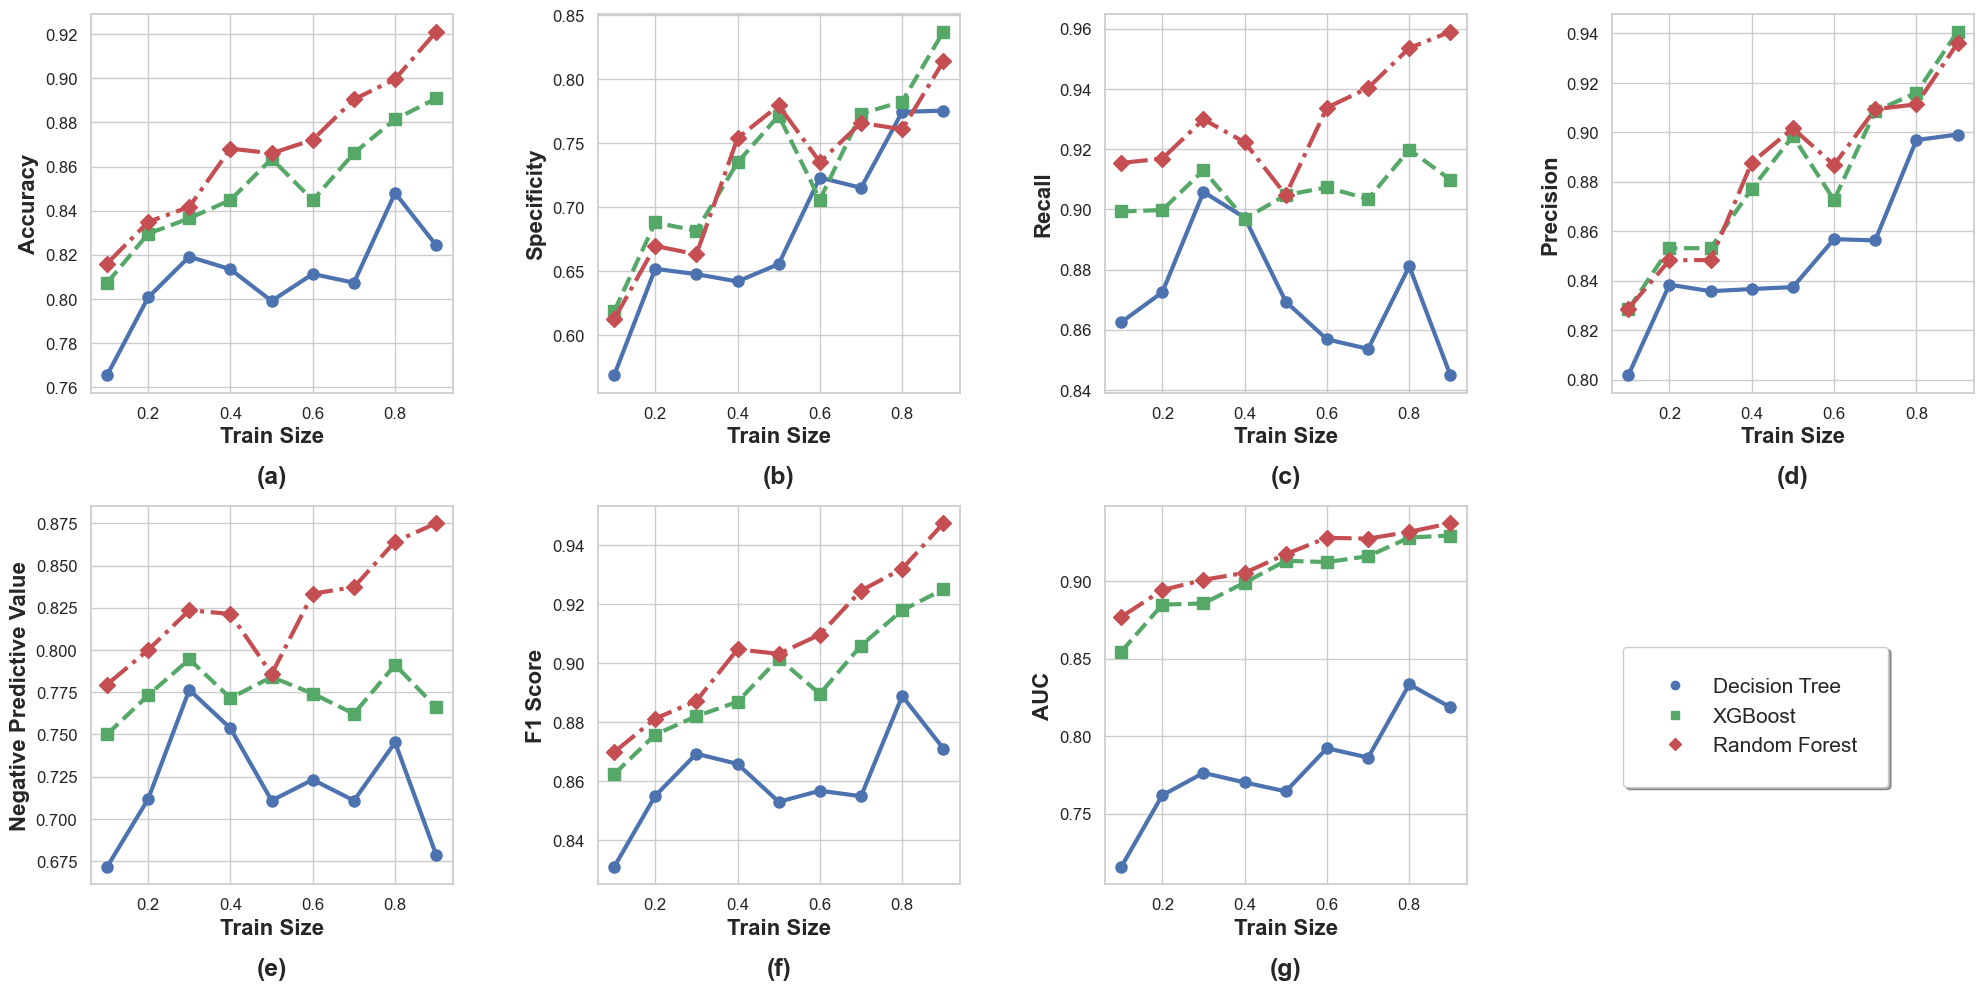

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for 2x4 layout
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 0].plot(train_sizes, accuracies_xgb, marker='s', label='XGBoost', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 0].set_ylabel('Accuracy', fontsize=16, fontweight='bold', family='Arial')
axes[0, 0].text(0.5, -0.24, '(a)', transform=axes[0, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Specificities
axes[0, 1].plot(train_sizes, specificities_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 1].plot(train_sizes, specificities_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 1].set_ylabel('Specificity', fontsize=16, fontweight='bold', family='Arial')
axes[0, 1].text(0.5, -0.24, '(b)', transform=axes[0, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Recalls
axes[0, 2].plot(train_sizes, recalls_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 2].plot(train_sizes, recalls_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 2].set_ylabel('Recall', fontsize=16, fontweight='bold', family='Arial')
axes[0, 2].text(0.5, -0.24, '(c)', transform=axes[0, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Positive Predictive Values
axes[0, 3].plot(train_sizes, positive_predictive_values_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 3].plot(train_sizes, positive_predictive_values_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 3].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 3].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 3].set_ylabel('Precision', fontsize=16, fontweight='bold', family='Arial')
axes[0, 3].text(0.5, -0.24, '(d)', transform=axes[0, 3].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# NPVs
axes[1, 0].plot(train_sizes, npvs_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 0].plot(train_sizes, npvs_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 0].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 0].set_ylabel('Negative Predictive Value', fontsize=16, fontweight='bold', family='Arial')
axes[1, 0].text(0.5, -0.24, '(e)', transform=axes[1, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# F1 Scores
axes[1, 1].plot(train_sizes, f1_scores_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 1].plot(train_sizes, f1_scores_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 1].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 1].set_ylabel('F1 Score', fontsize=16, fontweight='bold', family='Arial')
axes[1, 1].text(0.5, -0.24, '(f)', transform=axes[1, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# AUCs
axes[1, 2].plot(train_sizes, aucs_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 2].plot(train_sizes, aucs_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 2].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 2].set_ylabel('AUC', fontsize=16, fontweight='bold', family='Arial')
axes[1, 2].text(0.5, -0.24, '(g)', transform=axes[1, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Hide the last unused subplot
axes[1, 3].axis('off')

# Create a dummy plot for the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Decision Tree', color='b')
dummy_plot.plot([], [], 's', label='XGBoost', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(0.96, 0.1), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 15, 'family': 'Arial'})
dummy_plot.axis('off')

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('Images/11_SP_ml_classifier_metrics_2x4.jpeg', transparent=True)
plt.show()

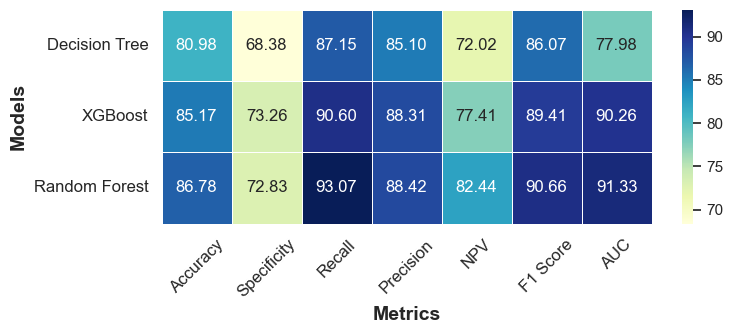

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Times New Roman as the default font
plt.rcParams.update({"font.family": "Arial"})

# Example performance metrics
models = ["Decision Tree", "XGBoost", "Random Forest"]

# Replace these lists with your actual performance metrics
data = {
    "Accuracy": [
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_xgb) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_xgb) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_xgb) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
    ],
    "Precision": [
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_xgb) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_xgb) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_xgb) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_xgb) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
    ],
}

# Create a DataFrame
performance_df = pd.DataFrame(data, index=models)

# Round values to 2 decimal places
performance_df = performance_df.round(2)

# Plot heatmap
plt.figure(figsize=(8, 3.5))
sns.heatmap(
    performance_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5
)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Models", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("Images/11_SP_ml_model_performance_heatmap_with_ppv_npv.jpeg", transparent=True)
plt.show()


In [10]:
data = {
    "Accuracy": [
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_xgb) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_xgb) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_xgb) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
    ],
    "PPV": [
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_xgb) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_xgb) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_xgb) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_xgb) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
    ],
}

data

{'Accuracy': [80.98008699648727, 85.16525569824628, 86.78060097844569],
 'Specificity': [68.37734870212927, 73.26253728201681, 72.8311021573939],
 'Recall': [87.15192005381951, 90.6004258627209, 93.06541182597516],
 'PPV': [85.09881358635788, 88.31241150661974, 88.42223355413573],
 'NPV': [72.0223162499328, 77.40883479273478, 82.44241405535132],
 'F1 Score': [86.06833767141542, 89.41402486632322, 90.66406552338708],
 'AUC': [77.98337060795964, 90.25846076864197, 91.32902628725357]}